# GoDaddyy - Microbusiness Density Forecasting

## Goal of the Competition

The goal of this competition is to predict monthly microbusiness density in a given area. You will develop an accurate model trained on U.S. county-level data.

Your work will help policymakers gain visibility into microbusinesses, a growing trend of very small entities. Additional information will enable new policies and programs to improve the success and impact of these smallest of businesses.

**Importing Python Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the data file using pandas**

In [2]:
df = pd.read_csv('godaddy-microbusiness-density-forecasting/train.csv')

In [3]:
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [4]:
df = df.drop('row_id', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   cfips                  122265 non-null  int64  
 1   county                 122265 non-null  object 
 2   state                  122265 non-null  object 
 3   first_day_of_month     122265 non-null  object 
 4   microbusiness_density  122265 non-null  float64
 5   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 5.6+ MB


In [6]:
from datetime import datetime

In [7]:
df['first_day_of_month'] = pd.to_datetime(df['first_day_of_month'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   cfips                  122265 non-null  int64         
 1   county                 122265 non-null  object        
 2   state                  122265 non-null  object        
 3   first_day_of_month     122265 non-null  datetime64[ns]
 4   microbusiness_density  122265 non-null  float64       
 5   active                 122265 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.6+ MB


**Checking for missing data and performing basic exploratory analysis**

In [9]:
df.isna().sum()

cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64

In [10]:
df.describe()

,cfips,microbusiness_density,active
count,122265.000000,122265.000000,1.222650e+05
mean,30376.037640,3.817671,6.442858e+03
std,15143.508721,4.991087,3.304001e+04
min,1001.000000,0.000000,0.000000e+00
25%,18177.000000,1.639344,1.450000e+02
50%,29173.000000,2.586543,4.880000e+02
75%,45077.000000,4.519231,2.124000e+03
max,56045.000000,284.340030,1.167744e+06


In [11]:
df.columns

Index(['cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active'],
      dtype='object')

<AxesSubplot:xlabel='microbusiness_density'>

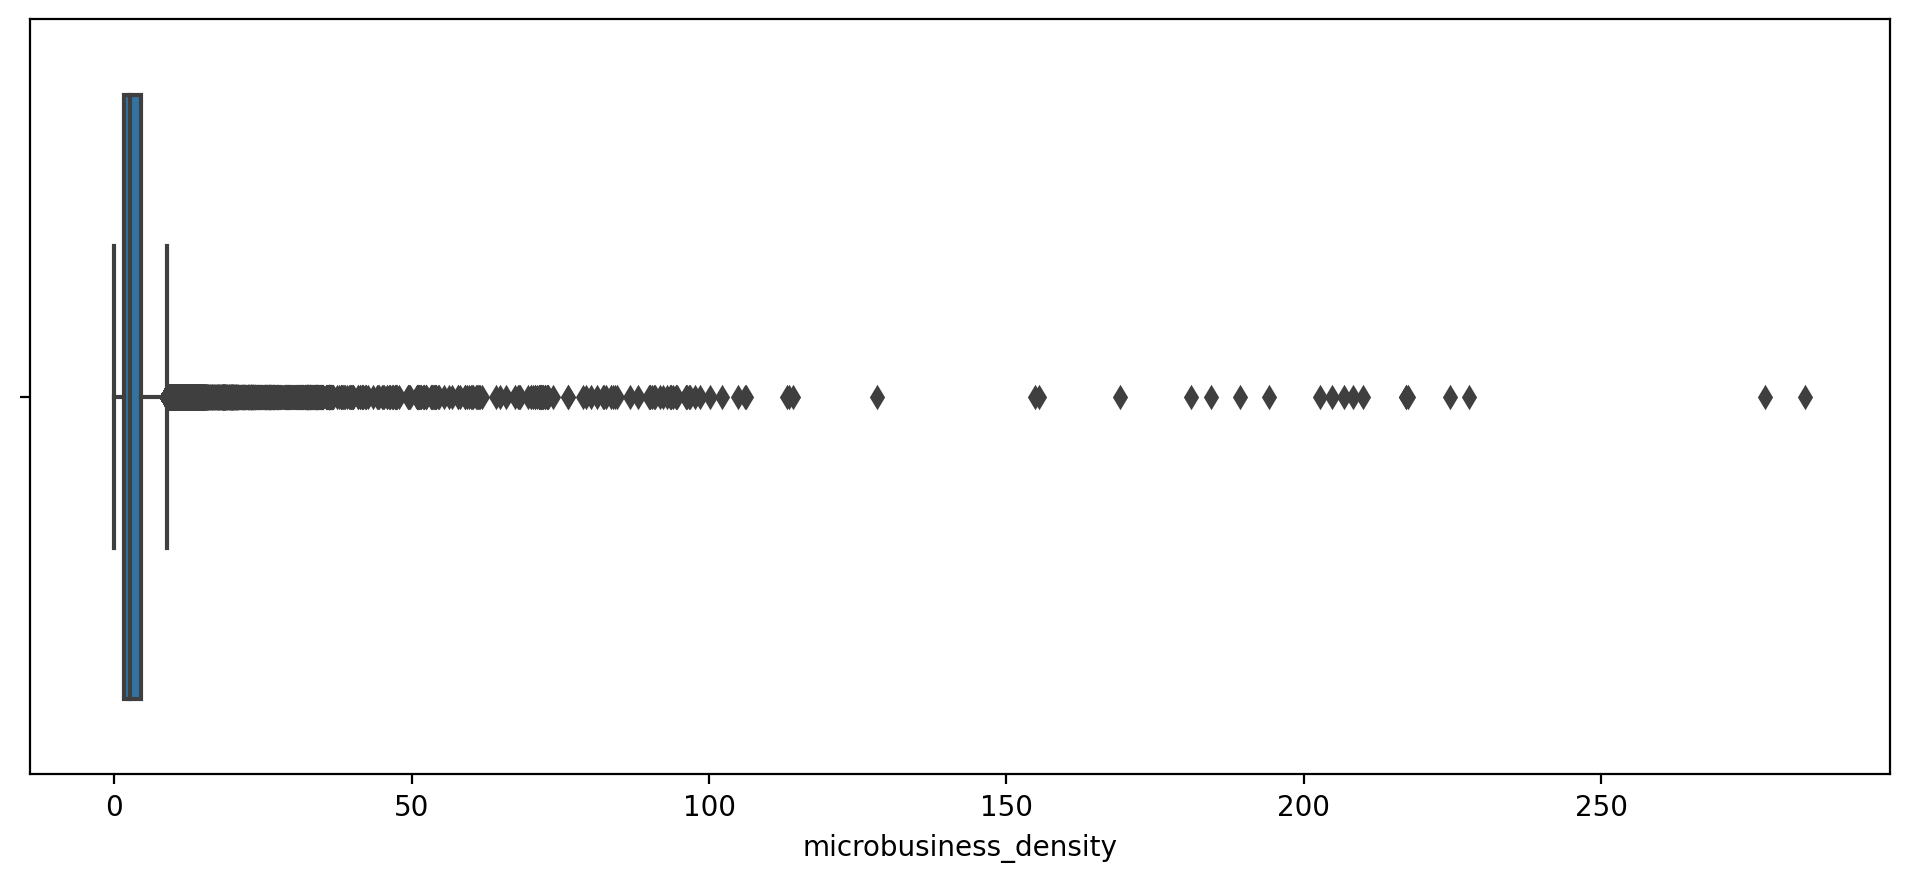

In [12]:
plt.figure(figsize=(12,5), dpi=200)
sns.boxplot(data=df, x='microbusiness_density')

In [13]:
df = df.drop(df[df['microbusiness_density'] > 6.5].index)

<AxesSubplot:xlabel='active'>

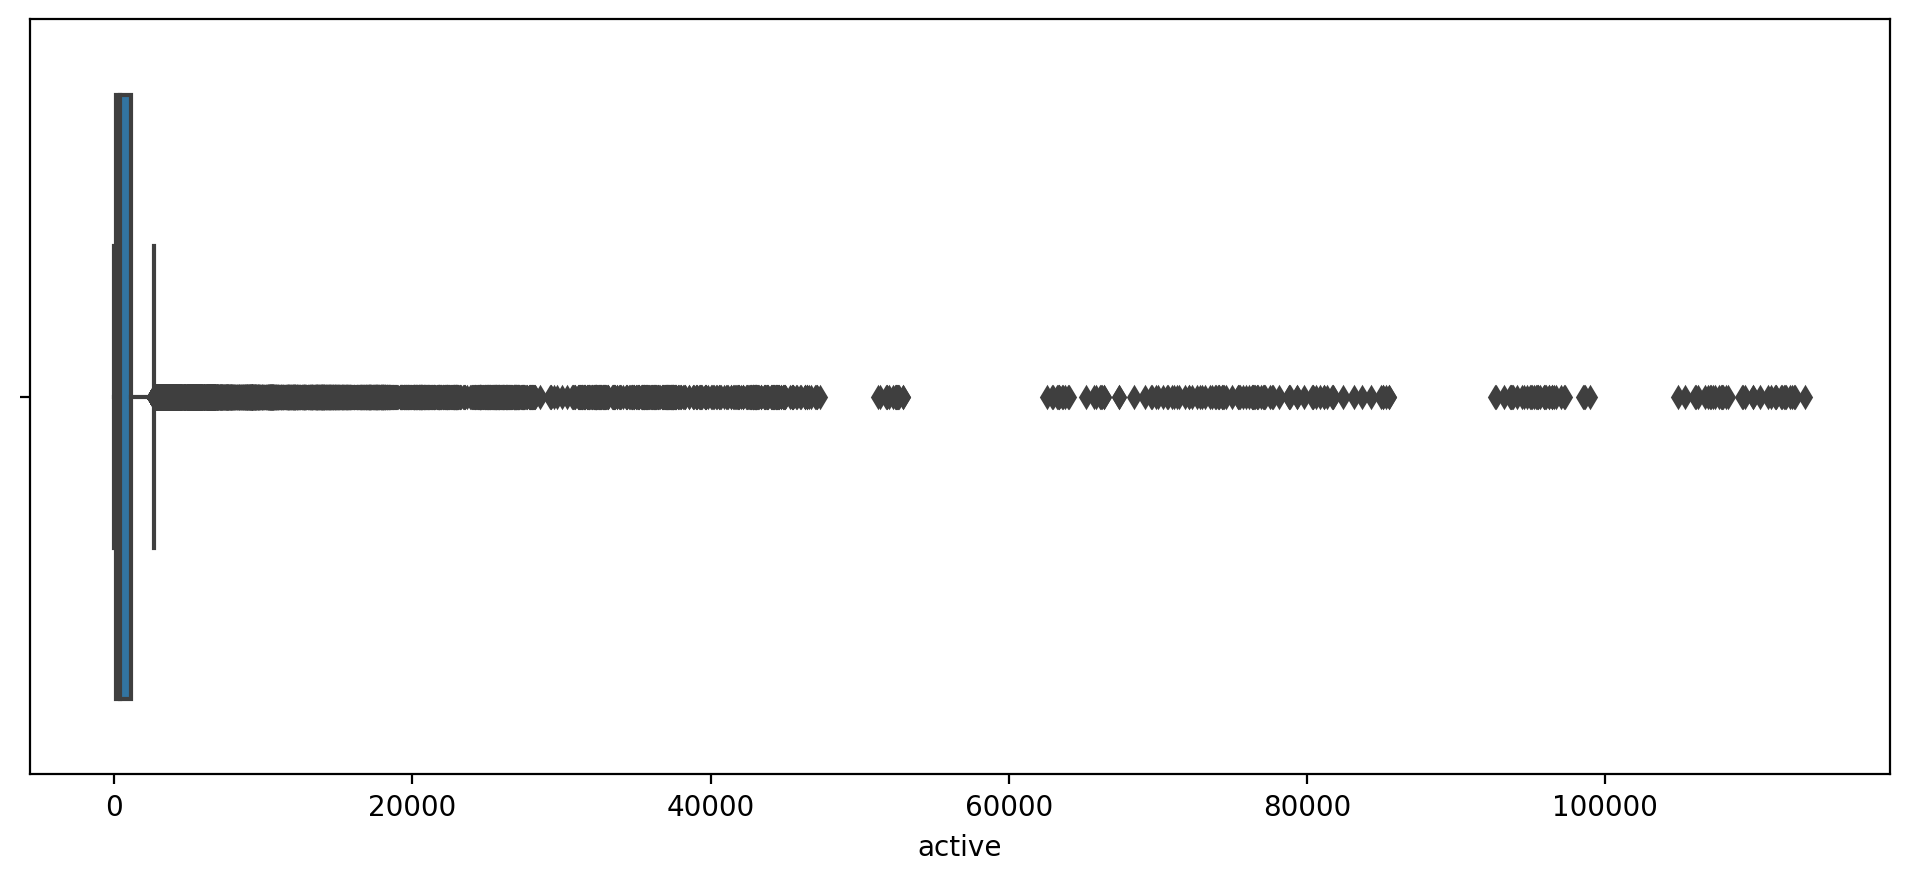

In [14]:
plt.figure(figsize=(12,5), dpi=200)
sns.boxplot(data=df, x='active')

In [15]:
df = df.drop(df[df['active'] > 900].index)

In [16]:
test_df = pd.read_csv('godaddy-microbusiness-density-forecasting/test.csv')

In [17]:
test_df.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [18]:
X = df.drop(['county', 'state', 'microbusiness_density', 'active', 'first_day_of_month'], axis=1)

In [19]:
y = df['microbusiness_density']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Importing and using XGBoostRegressor**

In [22]:
import xgboost as xgb

/Users/glenquadros/opt/anaconda3/envs/New_Environment/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [23]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=15, min_child_weight=2,
             monotone_constraints='()', n_estimators=1500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
model.fit(X_train, y_train)

/Users/glenquadros/opt/anaconda3/envs/New_Environment/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
preds = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
MAE = mean_absolute_error(y_test, preds)
MAE

0.14419299029781896

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test, preds))
RMSE

0.249455726949905

In [29]:
test_df.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


In [30]:
holdout_test = test_df['cfips'].values.reshape(-1, 1)

In [31]:
final_model = xgb.XGBRegressor()

In [32]:
final_model.fit(X,y)

/Users/glenquadros/opt/anaconda3/envs/New_Environment/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
final_preds = final_model.predict(holdout_test)

In [34]:
submission = pd.read_csv('godaddy-microbusiness-density-forecasting/sample_submission.csv')

In [35]:
submission.head()

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671


In [36]:
submission['microbusiness_density'] = final_preds

In [37]:
submission

,row_id,microbusiness_density
0,1001_2022-11-01,1.203748
1,1003_2022-11-01,1.203748
2,1005_2022-11-01,1.203748
3,1007_2022-11-01,1.308468
4,1009_2022-11-01,1.427258
...,...,...
25075,56037_2023-06-01,2.833128
25076,56039_2023-06-01,3.823139
25077,56041_2023-06-01,3.823139
25078,56043_2023-06-01,2.915230


In [38]:
final_result = submission.to_csv("submission.csv", index=False)